# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Pelé
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur

# Abstract 

Nowadays, heart disease can be regarded as one of the most fatal diseases in the world. And nearly 647,000 Americans die from heart disease every year. Thus, developing an ML model to detect and predict heart disease may help the patients get effective treatment at the early stage, significantly reducing the probability of causing death. To build the model, we decide to use a dataset that measures the possible indicators that cause heart disease like high blood pressure, alcohol, or smoking. By evaluating these indicators, we may be able to predict whether an individual has heart disease. CDC collects the data in the dataset through telephone surveys, including the health status of US adults in over 50 states. And before building the ML model, we will firstly preprocess the data, converting them into appropriate data types and abandoning some features if needed. After the model is created, we will use some metrics or criteria to evaluate its accuracy, determining whether it is a successful model.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

- DataSet link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

- There are a total of 320k observations and 18 variables or features. Of these 18 variables, 9 of them are Booleans, 5 of them are string, and 4 of them are numeric.

- For a single observation, it includes a comprehensive set of information about an individual, which allows us to predict whether an individual has heart disease with high accuracy. The report consists of sex, age, smoking history, etc.

- In all of these features or variables, 3 of them are very critical in determining the accuracy and reliability of our machine learning model. To be specific, age can be regarded as an essential factor influencing the probability of having heart disease, and we use numeric values to represent it. Second, smoking history can be seen as another critical indicator of heart disease. Most patients with heart diseases have a long smoking history. In this dataset, we use Boolean values to represent this information.

- Moreover, BMI also plays an essential role in affecting the likelihood of getting heart disease. Many studies have shown the close relationship between them. And we use numeric values (float) to represent it in this dataset.

- For the variables (features) that are Boolean or String, we need to convert them into categorical variables using one-hot encoding. Specifically, for the features that only have two categories,like "yes" or "no", we repalce them with 1 and 0 with lable encoding. And for others, we use one-hot encoding. For the numeric variables, we apply some normalization to adjust them in the same scale, which will help improve the accuracy of our machine learning model. Also, we make some feature selections. Precisely, we can calculate the Pearson correlation coefficient for the variables and found that the feature "race" is the least related to the occurence of heart disease; hence, we decide to drop it. The feature selection can help to make our algorithm more efficient by reducing the number of features.


### Data Cleaning

In [28]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [5]:
sex_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
sex_name = ["Female", "Male"]
sex_df.columns = sex_name
print(sex_df.shape)
sex_df.head()

(319795, 2)


,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [6]:
def one_hot_encode(x:np.ndarray):
    uni = np.unique(x)
    print(uni)
    result = np.zeros((len(x), len(uni)))
    for i in range(len(x)):
        for j in range(len(uni)):
            if x[i] == uni[j]:
                result[i][j] = 1;
                
    return result

In [7]:
race_arr = pd.DataFrame(df['Race']).to_numpy()
one_hot_race = one_hot_encode(race_arr)
race_df = pd.DataFrame(one_hot_race, columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
 'White'])
race_df.head()

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']


,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
diabetic_arr = pd.DataFrame(df['Diabetic']).to_numpy()
one_hot_diabetic = one_hot_encode(diabetic_arr)
diabetic_df = pd.DataFrame(one_hot_diabetic, columns = ['Diabetic(No)', 'Diabetic(No, borderline diabetes)', 'Diabetic(Yes)', 'Diabetic(Yes, during pregnancy)'])
diabetic_df.head()

['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']


,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)"
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [9]:
gen_health_arr = pd.DataFrame(df['GenHealth']).to_numpy()
one_hot_gen_health = one_hot_encode(gen_health_arr)
gen_health_df = pd.DataFrame(one_hot_gen_health, columns = ['GenHealth(Excellent)', 'GenHealth(Fair)', 
                                                            'GenHealth(Good)', 'GenHealth(Poor)', 'GenHealth(Very good)'])
gen_health_df.head()

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


,GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [10]:
df = df.drop(['Sex', 'Race', 'GenHealth', 'Diabetic', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Yes,No,No,No
2,No,Yes,No,No,No,Yes,Yes,No,No
3,No,No,No,No,No,No,No,No,Yes
4,No,No,No,No,Yes,Yes,No,No,No


In [11]:
df['Smoking'] = df['Smoking'].map(
                   {'Yes':1 ,'No':0})
df['HeartDisease'] = df['HeartDisease'].map(
                   {'Yes':1 ,'No':0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(
                   {'Yes':1 ,'No':0})
df['Stroke'] = df['Stroke'].map(
                   {'Yes':1 ,'No':0})
df['DiffWalking'] = df['DiffWalking'].map(
                   {'Yes':1 ,'No':0})
df['PhysicalActivity'] = df['PhysicalActivity'].map(
                   {'Yes':1 ,'No':0})
df['Asthma'] = df['Asthma'].map(
                   {'Yes':1 ,'No':0})
df['KidneyDisease'] = df['KidneyDisease'].map(
                   {'Yes':1 ,'No':0})
df['SkinCancer'] = df['SkinCancer'].map(
                   {'Yes':1 ,'No':0})
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0


In [12]:
df = pd.concat([df, sex_df], axis=1, join='inner')
df = pd.concat([df, race_df], axis=1, join='inner')
df = pd.concat([df, diabetic_df], axis=1, join='inner')
df = pd.concat([df, gen_health_df], axis=1, join='inner')
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,...,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0,1,0,0,0,1,1,0,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,0,1,0,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,1,1,0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,1,1,0,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Normalization

In [13]:
# read file
original_df = pd.read_csv('heart_2020_cleaned.csv')
original_df.shape

(319795, 18)

In [14]:
# take a look at the dataset
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [15]:
# age feature
original_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [16]:
#replace the range with the first number
original_df['AgeCategory'] = original_df['AgeCategory'].replace(['80 or older'],'80-')
original_df['AgeCategory'] = original_df['AgeCategory'].str.split('-').str[0].astype('float64')

In [17]:
# process numeric features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime
numeric_features = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']
scaler = StandardScaler()
original_df[numeric_features] = scaler.fit_transform(original_df[numeric_features])

In [18]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,0.141621,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,1.525151,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,0.695033,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,1.248445,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,-0.688497,White,No,Yes,Very good,0.628776,No,No,No


In [19]:
original_df = original_df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
                                'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [20]:
# combing dataframe
original_df = pd.concat([original_df, df], axis=1, join='inner')

In [21]:
result_df = original_df
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,...,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
pd.set_option('display.max_columns', None)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
result_df = result_df.drop(['Diabetic(No, borderline diabetes)', 'Diabetic(Yes, during pregnancy)'], axis=1)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
result_df.isnull().sum()

BMI                               0
PhysicalHealth                    0
MentalHealth                      0
AgeCategory                       0
SleepTime                         0
HeartDisease                      0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
DiffWalking                       0
PhysicalActivity                  0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
Female                            0
Male                              0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
Diabetic(No)                      0
Diabetic(Yes)                     0
GenHealth(Excellent)              0
GenHealth(Fair)                   0
GenHealth(Good)                   0
GenHealth(Poor)             

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [25]:
#import data after cleaning
result_df = pd.read_csv("data_after_cleaning.csv")
result_df.head

<bound method NDFrame.head of              BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  \
0      -1.844750       -0.046751      3.281069     0.141621  -1.460354   
1      -1.256338       -0.424070     -0.490039     1.525151  -0.067601   
2      -0.274603        2.091388      3.281069     0.695033   0.628776   
3      -0.647473       -0.424070     -0.490039     1.248445  -0.763977   
4      -0.726138        3.097572     -0.490039    -0.688497   0.628776   
...          ...             ...           ...          ...        ...   
319790 -0.144019        0.456341     -0.490039     0.418327  -0.763977   
319791  0.238291       -0.424070     -0.490039    -0.965203  -1.460354   
319792 -0.642753       -0.424070     -0.490039    -0.411791  -0.763977   
319793  0.705560       -0.424070     -0.490039    -1.518615   3.414282   
319794  2.868839       -0.424070     -0.490039     1.525151   0.628776   

        HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
0         

<AxesSubplot:>

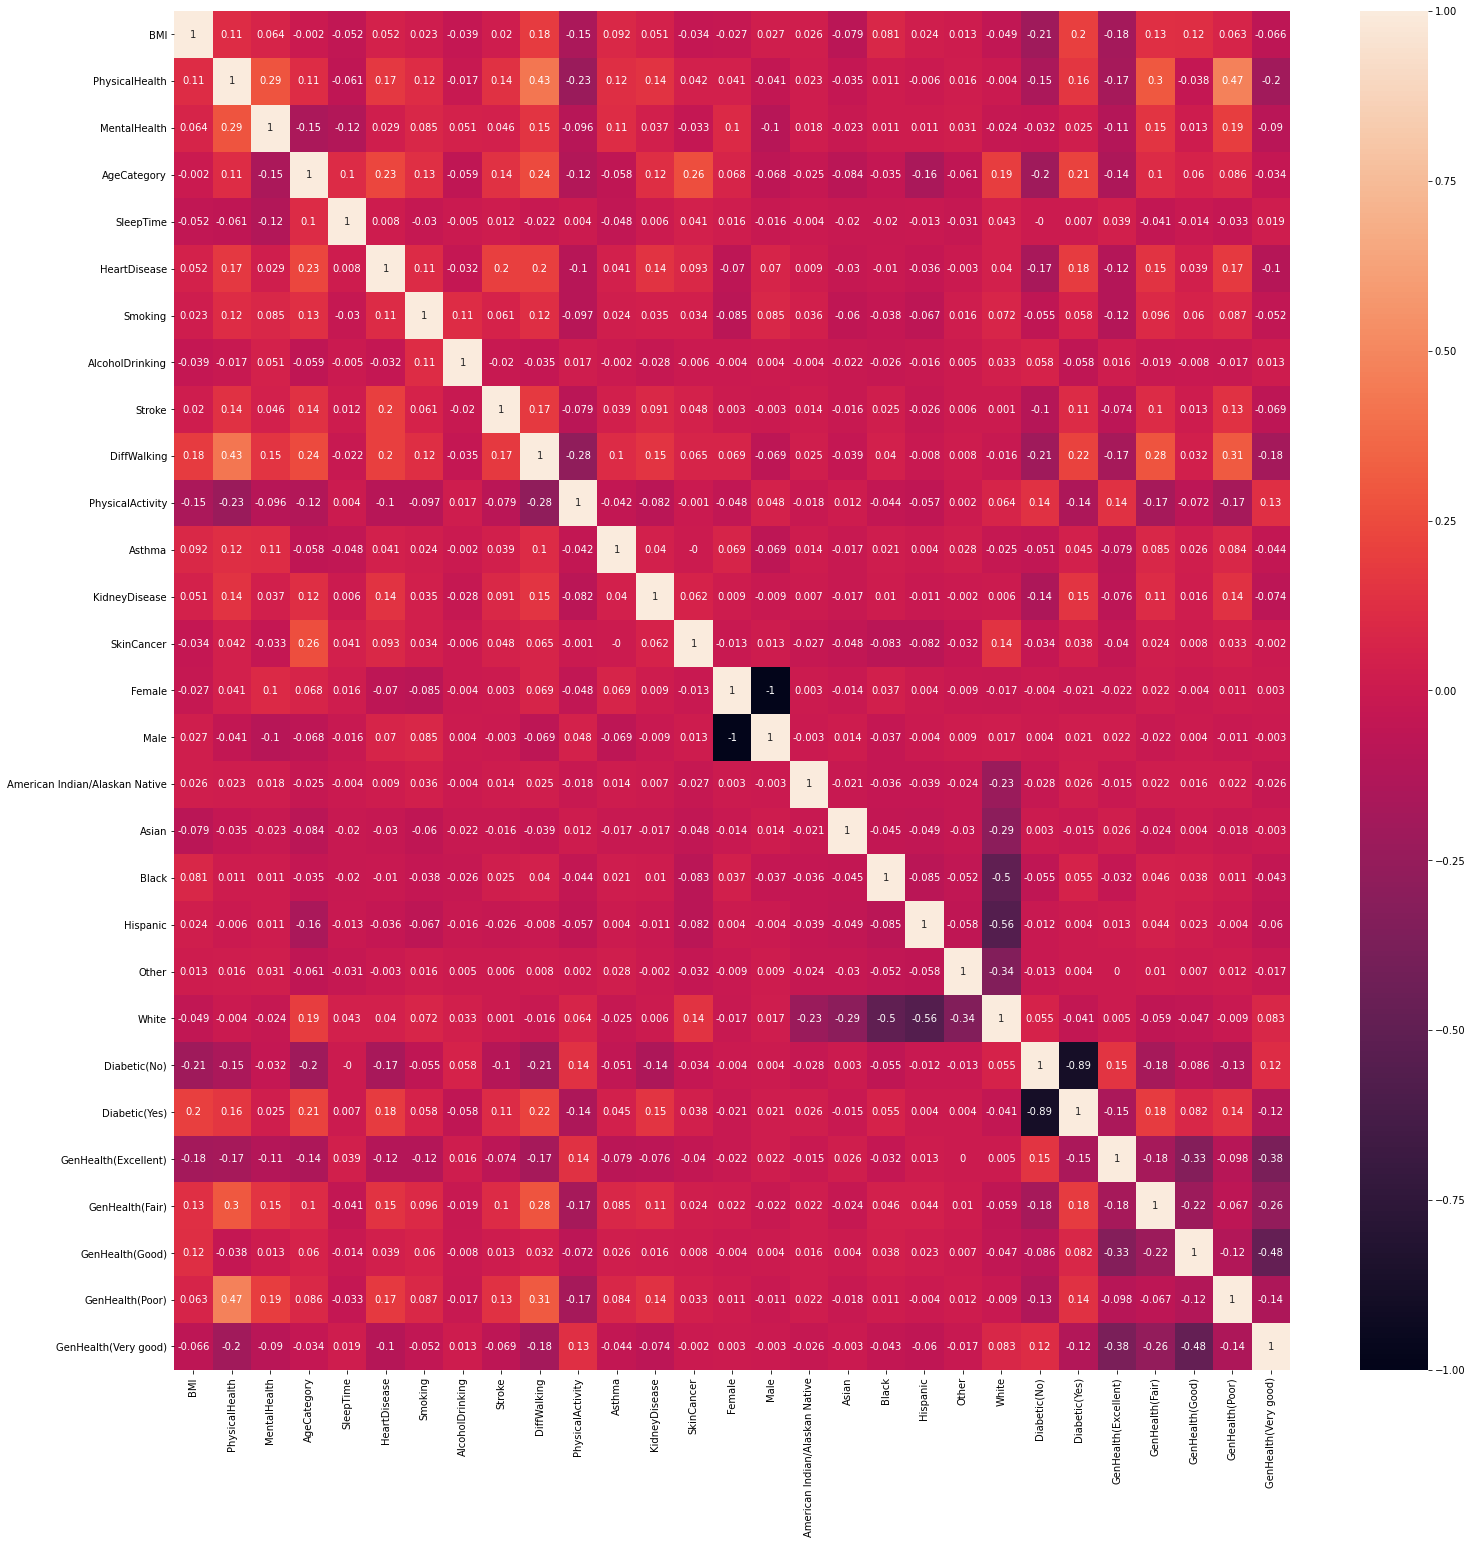

In [26]:
# correlation plot
correlation = result_df.corr().round(3)
plt.figure(figsize = (25,25))
sns.heatmap(correlation, annot = True, cmap = 'rocket')

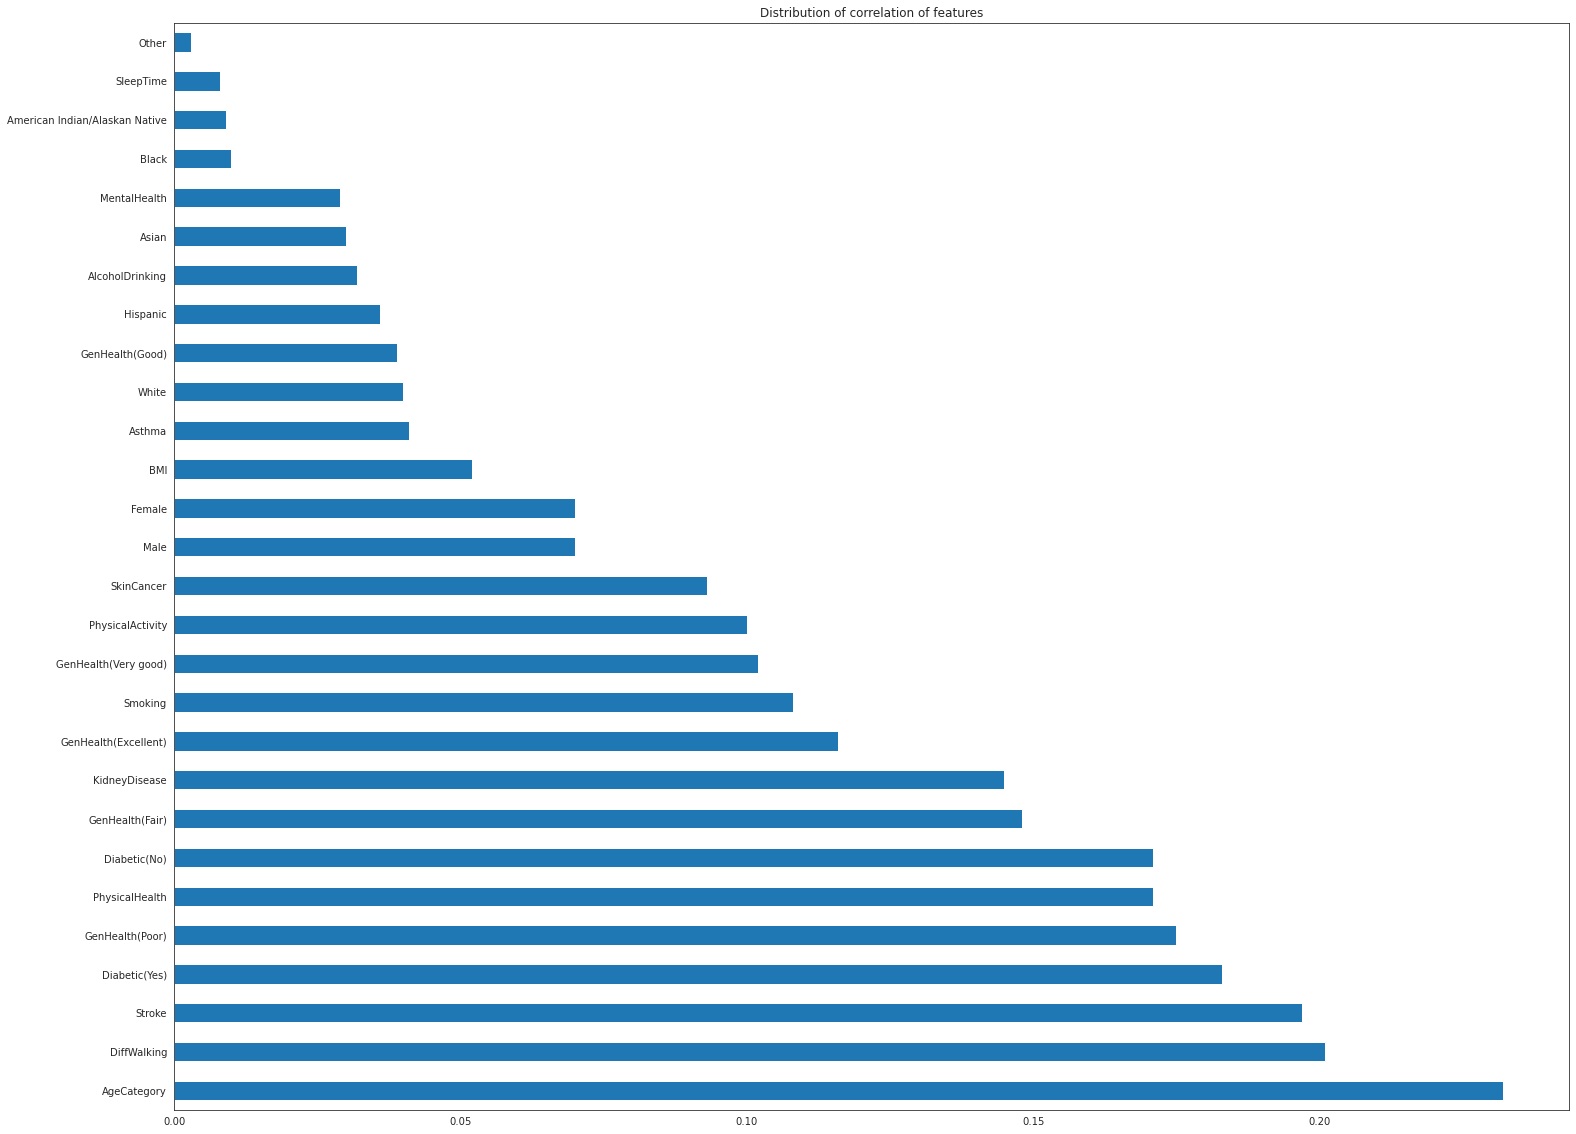

,HeartDisease
AgeCategory,0.232
DiffWalking,0.201
Stroke,0.197
Diabetic(Yes),0.183
GenHealth(Poor),0.175
PhysicalHealth,0.171
Diabetic(No),0.171
GenHealth(Fair),0.148
KidneyDisease,0.145
GenHealth(Excellent),0.116


In [27]:
#calculate the correlation coefficient
corr_result = pd.DataFrame(correlation.loc["HeartDisease"])
corr_result = abs(corr_result.drop(["HeartDisease"]))
corr_result = corr_result.sort_values("HeartDisease", ascending = False)
sns.set_style('white')
sns.set_palette('tab10')
plt.figure(figsize = (25,20))
plt.title('Distribution of correlation of features')
abs(corr_result['HeartDisease']).plot.barh()
plt.show()
corr_result

In [32]:
#drop features that are not important
result_df = result_df.drop(['Asian','Black','White','Hispanic','American Indian/Alaskan Native'], axis=1)

In [33]:
#split dataset into three parts
split_data = []
for i in range(3):
    split_data.append(result_df.sample(result_df.shape[0]//3, replace = False, random_state = 42))

First Dataset: SVM

Second Dataset: Decision Tree

Third Dataset: Logistic Regression

### Decision Tree

In [34]:
split_data[1].dtypes

BMI                     float64
PhysicalHealth          float64
MentalHealth            float64
AgeCategory             float64
SleepTime               float64
HeartDisease              int64
Smoking                   int64
AlcoholDrinking           int64
Stroke                    int64
DiffWalking               int64
PhysicalActivity          int64
Asthma                    int64
KidneyDisease             int64
SkinCancer                int64
Female                  float64
Male                    float64
Other                   float64
Diabetic(No)            float64
Diabetic(Yes)           float64
GenHealth(Excellent)    float64
GenHealth(Fair)         float64
GenHealth(Good)         float64
GenHealth(Poor)         float64
GenHealth(Very good)    float64
dtype: object

In [35]:
## data split
X = split_data[1].drop(["HeartDisease"], axis=1)
y = split_data[1]["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [56]:
%%time
#default decision tree model
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)

CPU times: user 400 ms, sys: 19.9 ms, total: 420 ms
Wall time: 418 ms


DecisionTreeClassifier(random_state=42)

In [57]:
#metrics for default decision tree
train_score = decision_tree.score(X_train, y_train)
test_score = decision_tree.score(X_test,y_test)

y_pred = decision_tree.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred,))
print("Train_score:", train_score)
print("Test_score", test_score)

F1 score: 0.24605103280680438
Train_score: 0.9987194821642159
Test_score 0.8602988771001604


### Parameter Search for decision tree

In [38]:
#class weight
weight = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
search_space = {"criterion":["gini", "entropy"], "max_depth":[2,4,6,8,10,12,14,16,18,20],
                'max_features':['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.01, 0.03,0.09,0.1], 
                "min_samples_leaf": [1,3,5,7,9,11,13,15,17,19], 'class_weight': weight}

In [39]:
# use Stratified Kfold
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [15]:
#grid search
decision_tree_model = DecisionTreeClassifier(random_state = 1024)
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=search_space, cv=skf, verbose = True , n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1024), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.03, 0.09, 0.1],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19]},
             verbose=True)

In [16]:
#best model
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)

### Result for decision tree

In [40]:
#decision tree based on f1 value
decision_tree_f = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 1, 1: 10},
                       criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=19, random_state=1024)
decision_tree_f.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 1, 1: 10},
                       criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=19, random_state=1024)

In [41]:
# test result
train_score_f = decision_tree_f.score(X_train, y_train)
test_score_f = decision_tree_f.score(X_test,y_test)

y_pred_f = decision_tree_f.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred_f,))
print("Train_score:", train_score_f)
print("Test_score", test_score_f)

F1 score: 0.2891077962285392
Train_score: 0.6474917329205657
Test_score 0.6445839079165846


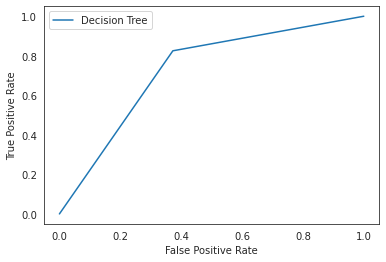

Logistic: ROC AUC=0.726


In [42]:
# auc, roc curve
dt1_auc_score = roc_auc_score(y_test, y_pred_f)
dt1_fpr, dt1_tpr, _ = roc_curve(y_test, y_pred_f)

plt.plot(dt1_fpr, dt1_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Logistic: ROC AUC=%.3f' % (dt1_auc_score))

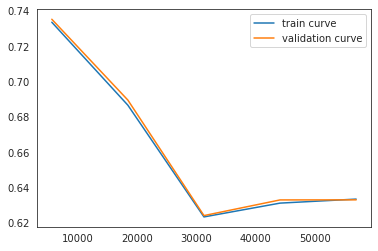

In [54]:
# Learning curve
train_sizes1, train_scores1, test_scores1, fit_times, _ = learning_curve(decision_tree_f, X_train, y_train, cv=skf,return_times=True, n_jobs = -1)
plt.plot(train_sizes1,np.mean(train_scores1,axis=1),label = "train curve")
plt.plot(train_sizes1,np.mean(test_scores1,axis=1),label = "validation curve")
plt.legend()

In [50]:
#decision tree based on accuracy
decision_tree_a = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)
decision_tree_a.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)

In [51]:
# test result
train_score_a = decision_tree_a.score(X_train, y_train)
test_score_a = decision_tree_a.score(X_test,y_test)

y_pred_a = decision_tree_a.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred_a,))
print("Train_score:", train_score_a)
print("Test_score", test_score_a)

F1 score: 0.0
Train_score: 0.9139660873847886
Test_score 0.9124194410829369


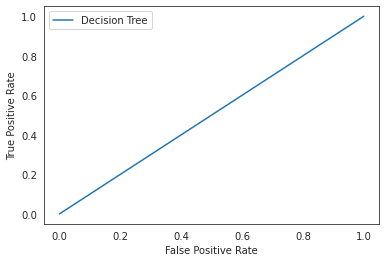

Logistic: ROC AUC=0.500


In [52]:
# auc roc curve
dt2_auc_score = roc_auc_score(y_test, y_pred_a)
dt2_fpr, dt2_tpr, _ = roc_curve(y_test, y_pred_a)

plt.plot(dt2_fpr, dt2_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Logistic: ROC AUC=%.3f' % (dt2_auc_score))

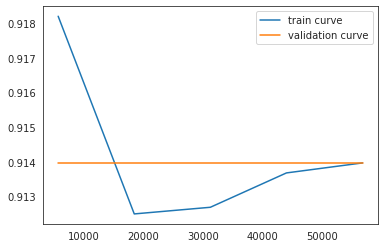

In [55]:
# Learning curve
train_sizes2, train_scores2, test_scores2, fit_times, _ = learning_curve(decision_tree_a, X_train, y_train, cv=skf,return_times=True, n_jobs = -1)
plt.plot(train_sizes2,np.mean(train_scores2,axis=1),label = "train curve")
plt.plot(train_sizes2,np.mean(test_scores2,axis=1),label = "validation curve")
plt.legend()

### Decision Tree Summary

- Decision tree is not very suitable for this dataset. The main reason is that the dataset is quite imbalanced: about 90% of the samples are marked as 0 while 10% are marked as 1. And to deal with the imbalanced dataset, we actually try many approches. First of all, we adjust the weight of the rare class, so misclassifying the rare class will have the higher cost. Second, we use Stratified Kfold to make sure that each split contains the same proportion amount of positive and negative class. After trying all these approches, the results are still not very good. Therefore, we conclude that the decision tree algorithm is not very suitble for this dataset


- We perform the feature selection on the raw data. We firstly compute the Pearson Coefficient for each feature, determining the strength of its correlation. And we found that the "race" feature is the least related. Therefore, we decide to drop those columns. This reduces our number of features from 29 to 24.


- For decision tree model, we firstly use a default decision tree without any parameters. Its accruacy is around 86% and its f-value is about 0.246. So the accuracy is not very high and f-score is relatively low. This is mainly because the dataset is quite imbalanced. And we will add some parameters to handle such situation.

- We build learning curves for the two decision tree models above: one model is based on accuracy, while the other one is based on accuracy. From the learning curve, we can see that for the model based on f-value, its traninig curve and validation curve are basically the same, so its performance is relatively stable. However, its accuracy is quite low. For the model based on accuracy, its validation curve did not change, which may suggest that there may not lot of training there. From the two learning curves here, we can conclude that the decision tree model is not very suitable for the dataset.

# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
